# Interpolation search
### Introduction
The background to the interpolation search is described in **MOD007357 Coursework Brief 2021-22 (Task a)**, as search algorithm for sorted arrays to find the position of a search value. The task is to compare search performance for three strategies:

1. Pure interpolation search
2. Mixed interpolation search and binary search
3. Pure binary search

### Implementation summary
The seearch algorithms have been implemented in the *python* programming language, and can be applied to an input array by initialising an `ArraySearcher` class with the array, and calling the class' `search()` method - providing a search strategy input.

### ZIP archive
The code output of running the `main()` method can be found in the associated ZIP archive (`interpolation-search.zip`). Contents:

```
interpolation-search.zip
  - Interpolation search.html
  - Interpolation search.ipynb
  - interpolation_search.py
  - README.md
  - environment.yml
  results/
    - comparison_pandas.png
    - testing_df.csv
```

### Dependencies
The `conda` environment required to run the `interpolation_search.py` code, and this notebook, can be recreated from the *environment.yml* file in the ZIP archive, and activated as follows:

```bash
conda env create -f environment.yml
conda activate interpolation-search
```

We can use a jupyter 'magic' command to generate the *environment.yml* file.

In [14]:
!conda env export --from-history > environment.yml

### Notebook
This notebook was created within the same python `conda` environment used to run the `interpolation_search.py`.

To generate the PDF version, the notebook was exported to HTML format and then printed to PDF format from Google Chrome.

### Imports

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from interpolation_search import ArraySearcher
from interpolation_search import generate_random_array, run_tests

pd.set_option('display.max_rows', 10)  # Keep table displays short
sns.set_context('talk')  # Make seaborn plots have good font sizes, line widths, etc 

### Walkthrough examples

An example of each of our 3 searching algorithms can be seen below for a single input array.

#### Input parameters

In [16]:
MIN_VAL = 0
MAX_VAL = 1000
CARDINALITY = 50

#### Generate the array

In [17]:
array = generate_random_array(MIN_VAL, MAX_VAL, CARDINALITY)
print(sorted(array))

[52, 63, 64, 93, 122, 140, 163, 184, 185, 197, 207, 252, 263, 299, 321, 360, 378, 378, 405, 417, 422, 444, 462, 476, 513, 519, 524, 537, 539, 546, 561, 568, 595, 615, 643, 668, 690, 692, 709, 715, 723, 750, 760, 824, 870, 881, 914, 918, 928, 941]


#### Make an ArraySorter
The `ArraySearcher` class will ensure any array passed to it is sorted before applying a search algorithm.  Once initialised, it can also choose its own *query_val*.

In [18]:
searcher = ArraySearcher(array)
query_val = searcher.get_random_array_item()
print(query_val)

690


#### Apply each search algorithm in turn

In [19]:
results = searcher.compare_methods(query_val, verbose=True)

Iteration:   0 | Starting info        | Query value: 690 | Bottom index:  0 | Top index: 49 | Bottom value:  52 | Top value: 941
The query value (690) was found at index 36 (of the sorted array) after 2 iteration(s)
With interpolation method it took 2 search step(s) to find the query value.
Iteration:   0 | Starting info        | Query value: 690 | Bottom index:  0 | Top index: 49 | Bottom value:  52 | Top value: 941
The query value (690) was found at index 36 (of the sorted array) after 2 iteration(s)
With mixed method it took 2 search step(s) to find the query value.
Iteration:   0 | Starting info        | Query value: 690 | Bottom index:  0 | Top index: 49 | Bottom value:  52 | Top value: 941
The query value (690) was found at index 35 (of the sorted array) after 5 iteration(s)
With binary method it took 5 search step(s) to find the query value.


Running the `compare_methods()` function returns a dictionary that summarises number of iterations used by each method to find the *query_val*.

In [20]:
results

{'interpolation': 2, 'mixed': 2, 'binary': 5}

### Testing increasing cardinalities
It is interesting to see how the different methods compare as we increase the length (cardinality) of the input array.  To do this, we can make use of the `run_tests()` method from `interpolation_search.py`.

In [21]:
def run_tests(start_cardinality, growth_mode, growth_factor, growth_steps, repeats, 
              min_array_val, max_val_factor):
    """Runs repeated tests on each provided cardinality, generating a random array
    each time and comparing each splitting method on that array.

    Args:
        start_cardinality (int): The cardinality to start with.
        growth_mode (str): Whether to grow the cardinality arithmetically 
        ('arithmetic'), or geometrically ('geometric').
        growth_factor (int): The amount to grow the cardinality by on each step.
        growth_steps (int): The number of times to grow the cardinality.
        repeats (int): Number of repeats.
        min_array_val (int): Minimum possible value in the array.
        max_val_factor (int): Scaling factor to set the maximum possible
                              value in the array by multiplying by the cardinality.

    Returns:
        list[dicts]: A list of dictionaries of length 'repeats'.
                     Keys are the method names, plus 'cardinality'.
                     Values are the method absolute subset differences, 
                     plus cardinality
    """
    testing_results = []
    for _ in range(repeats):
        cardinality = start_cardinality
        for step in range(growth_steps):
            if growth_mode == 'arithmetic':
                cardinality = cardinality + (step * growth_factor)
            elif growth_mode == 'geometric':
                cardinality = cardinality * (step + 1) * growth_factor

            array = generate_random_array(min_val=min_array_val, 
                                          max_val=max_val_factor * cardinality,
                                          cardinality=cardinality)

            searcher = ArraySearcher(array)
            query_val = searcher.get_random_array_item()
            results = searcher.compare_methods(query_val)
            results['cardinality'] = cardinality
            testing_results.append(results)
    return testing_results


This convenience function allows us to start with a cardinality value (*start_cardinality*), and grow this by *growth_factor* for *growth_steps* steps.  Depending on *growth_mode*, the steps are either *arithmetic* or *geometric*.

The geometric steps give a real performance problem(!), so we will limit parameters accordingly.

#### Input parameters

In [22]:
MIN_ARRAY_VAL = 1
START_CARDINALITY = 10
MAX_VAL_FACTOR = 10
GROWTH_STEPS = 6
GROWTH_FACTOR = 2
REPEATS = 100

#### Run the tests

In [23]:
for growth_mode in ['arithmetic', 'geometric']:
    testing_results = run_tests(start_cardinality=START_CARDINALITY, 
                                growth_mode=growth_mode,
                                growth_factor=GROWTH_FACTOR, 
                                growth_steps=GROWTH_STEPS, 
                                repeats=REPEATS,
                                min_array_val=MIN_ARRAY_VAL, 
                                max_val_factor=MAX_VAL_FACTOR)

In [24]:
testing_df = pd.DataFrame(testing_results)
testing_df

,interpolation,mixed,binary,cardinality
0,2,3,3,20
1,2,2,3,80
2,3,4,8,480
3,3,4,11,3840
4,4,5,12,38400
...,...,...,...,...
595,3,3,4,80
596,5,8,8,480
597,3,4,11,3840
598,3,4,12,38400


### Plotting with Seaborn
The above shape of the data is convenient for readability, but not so good for certain plotting approaches.  The `seaborn` package makes plotting data (including data from a `pandas.DataFrame`) easy, but it is best to provide the data in a "tall, skinny" format.

#### Convert raw results into tall-skinny DataFrame
The raw data can be unpivotted using `pandas.melt()`.  This gives us the tall, skinny version of the output data where each method appears not as a column, but as a value in a single 'method' column.

In [25]:
tall_df = pd.melt(testing_df, id_vars=['cardinality'],
                  var_name='method', value_name='iterations')
tall_df

,cardinality,method,iterations
0,20,interpolation,2
1,80,interpolation,2
2,480,interpolation,3
3,3840,interpolation,3
4,38400,interpolation,4
...,...,...,...
1795,80,binary,4
1796,480,binary,8
1797,3840,binary,11
1798,38400,binary,12


#### Plot
Seaborn's `lineplot()` method is an appropriate choice.  This method will plot the mean of the data, and can automatically show variation from the mean in a number of ways.  As we are probably most interested in how confident we are in the predicted mean values, 95% confidence intervals have been chosen (rather than standard deviations).

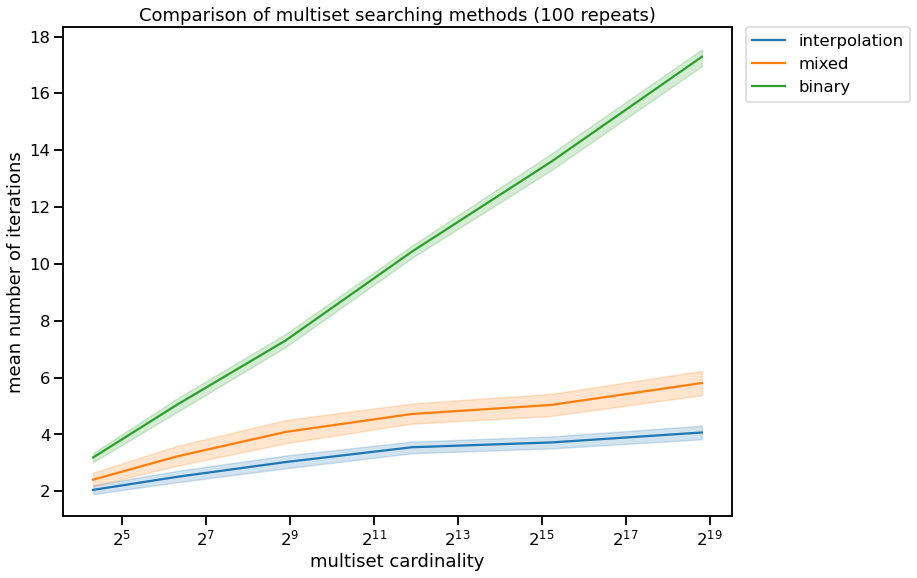

In [26]:
fig, ax = plt.subplots(figsize=(12, 9), facecolor='white')
ax = sns.lineplot(data=tall_df, x='cardinality', y='iterations', hue='method', ci=95)
ax.set_xlabel('multiset cardinality')
ax.set_xscale('log', base=2)
ax.set_ylabel('mean number of iterations')
# Put legend outside plot
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Underscore assignment to supress Text object output
_ = ax.set_title(f'Comparison of multiset searching methods ({REPEATS} repeats)')

Both of the above steps can be conveniently run by calling the `seaborn_plot()` method from `partition_problem.py`.  The inputs to this function are simply the raw result dictionary list, and the list of cardinality values used to generate the results:

```python
fig = seaborn_plot(results=testing_results, repeats=REPEATS)
```